{0.0} <music21.stream.Stream 0x1c4be5fc260>
    {0.0} <music21.instrument.Piano 'Piano'>
    {0.0} <music21.note.Note E>
    {1.5} <music21.note.Note G>
    {3.0} <music21.note.Note D>
    {6.0} <music21.note.Note A>
    {7.0} <music21.note.Note D>
    {9.0} <music21.note.Note B>
    {9.5} <music21.note.Note E>
    {11.0} <music21.note.Note A>
    {11.5} <music21.note.Note C>
    {14.5} <music21.note.Note E>
    {15.0} <music21.note.Note C>
    {16.5} <music21.note.Note C>
    {18.5} <music21.note.Note C>
    {21.5} <music21.note.Note A>
    {23.5} <music21.note.Note A>
    {24.0} <music21.note.Note D>
    {27.0} <music21.note.Note E>
    {28.0} <music21.note.Note B>
    {28.5} <music21.note.Note C>
    {31.5} <music21.note.Note A>
    {34.5} <music21.note.Note E>
    {37.5} <music21.note.Note E>
    {39.0} <music21.note.Note E>
    {40.5} <music21.note.Note E>
    {43.5} <music21.note.Note E>
    {46.5} <music21.note.Note C>
    {47.5} <music21.note.Note G>
    {48.0} <music21.note.No

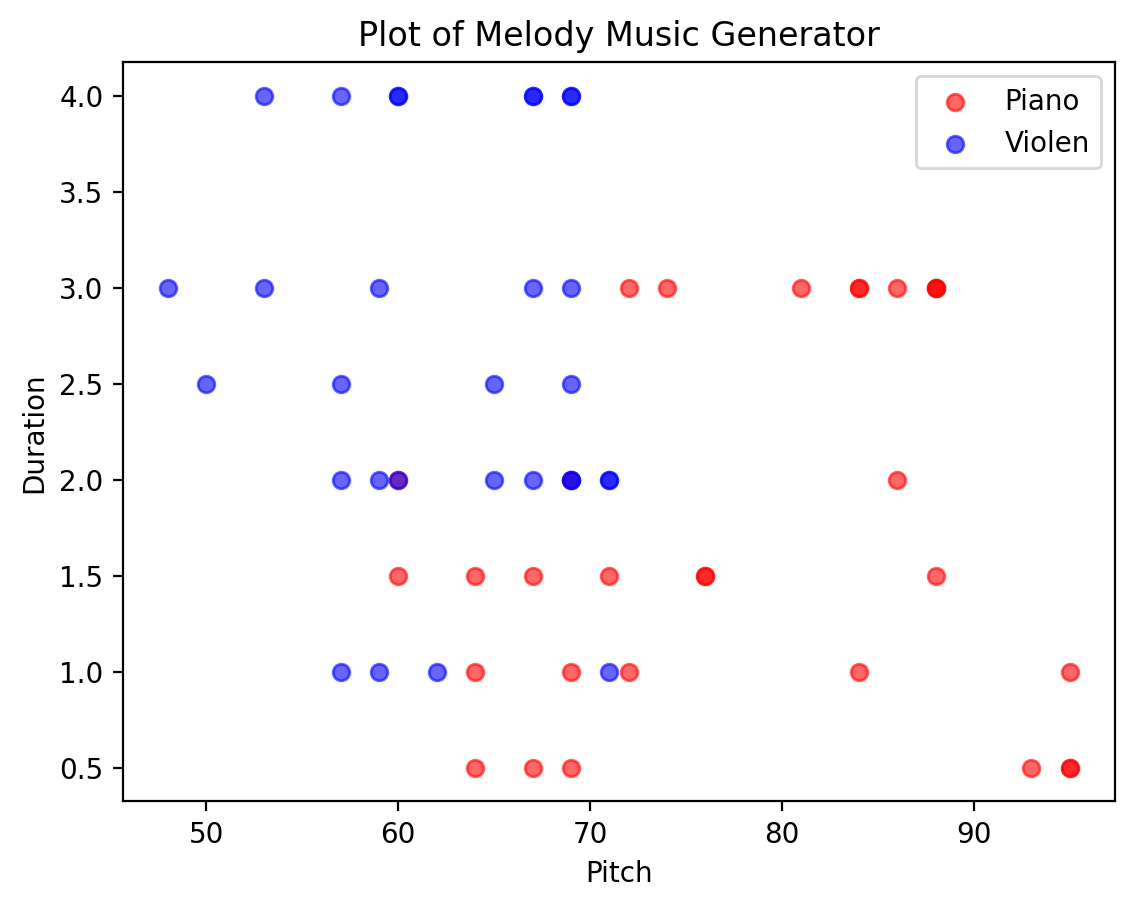

In [23]:
from music21 import stream, note, chord, midi, converter, instrument, tempo
import random, pygame, time
import matplotlib.pyplot as plt

#create piano melody 
def generate_melody_with_notes():
    notes = ['A4', 'B4', 'C4', 'D4', 'E4', 'F4', 'G4','A5', 'B5', 'C5','D5','E5','F5' ,'A6', 'B6', 'C6', 'D6','E6', 'F6', 'G6']
    melody = stream.Stream()
        
    for notes_names in range(30):
        pitch = random.choice(notes)
        dir = random.choice([0.5, 1, 1.5, 2, 3])
        volume = ([0.7])

        n = note.Note(pitch)
        n.duration.quarterLength = dir
        melody.append(n)
    return melody
melody = generate_melody_with_notes()
#create violin portion/accompany
def generate_accompany():
    pitches = ['A4', 'B4', 'C4', 'D4', 'E4', 'F4', 'G4', 'A3', 'B3', 'C3', 'D3', 'F3']
    accompany = stream.Stream()
    
    for note_name in range(30):
        pitch = random.choice(pitches)
        dir = random.choice([ 1, 2, 2.5, 3, 4])
        volume = ([0.7])
        
        n = note.Note(pitch)
        n.duration.quarterLength = dir
        accompany.append(n)
    return accompany
accompany = generate_accompany()

melody.insert(0, instrument.Piano())
accompany.insert(0, instrument.Violin())

#Add tempo to melody
tempo = tempo.MetronomeMark(number=140) #tempo set to (number) bpm
melody.append(tempo)

harmony = stream.Score([melody, accompany])
#create score and save midi
harmony.show('text')
harmony.write('midi', fp='generate_melody_with_accompany.mid')
print("MIDI file with accompany generated")
# play piano then violin
melody_player = midi.realtime.StreamPlayer(melody)
accompany_player = midi.realtime.StreamPlayer(accompany)

#play piano
melody_player.play()

time.sleep(2) # gap between piano and violin

#play violin
accompany_player.play()

#play midi file
from IPython.display import Audio
Audio('generate_melody_with_accompany.mid')

#method to plot the pitch and duration of the piano and violin 
def plot_music(melody, accompany):
    melody_pitches = [n.pitch.midi for n in melody.flatten().notes]
    melody_dur = [n.duration.quarterLength for n in melody.flatten().notes]
    accompany_pitches = [n.pitch.midi for n in accompany.flatten().notes]
    accompany_dur = [n.duration.quarterLength for n in accompany.flatten().notes]

    plt.scatter(melody_pitches, melody_dur, label="Piano", color='red', alpha=0.6)
    plt.scatter(accompany_pitches, accompany_dur, label="Violin", color='blue', alpha=0.6)
    plt.xlabel('Pitch')
    plt.ylabel('Duration')
    plt.title('Plot of Melody Music Generator')
    plt.legend()
    plt.show()
plot_music(melody, accompany)
   